In [1]:
%load_ext autoreload
%autoreload 2

# Using vaccine clinic model to explore scenarios

I've installed the vaccine_clinic package locally with

```python
pip install .
```

Before doing that, I added the following to `__init__.py` in the `src/vaccine_clinic` folder:

```python
from vaccine_clinic.vaccine_clinic_model4 import simulate
from vaccine_clinic.vaccine_clinic_model4 import process_sim_output
```

so that we can do the following import:

```python
from vaccine_clinic import simulate, process_sim_output
```

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from vaccine_clinic import simulate, process_sim_output


The following code comes from the `use_vaccine_clinic_model4.py` that I had created just to facilitate testing things out during development. However, it lends itself well to using from a Jupyter notebook to quickly explore different scenarios. We can edit any input arguments we want by making changes to the `args` dictionary and making sure to update the `scenario` value.

For example, earlier in this module we saw that with 3 reg staff, patients were waiting a few minutes at this stage. Let's increase the number of reg staff to 4, leave the number of greeters and schedulers at 3, and try 13 vaccinators. I'll set the `scenario = 'base_g3r4v13s3'`.

In [10]:
args = {'patient_arrival_rate': 180,
        'num_greeters': 3,
        'num_reg_staff': 3,
        'num_vaccinators': 13,
        'num_schedulers': 3,
        'scenario': 'base_g3r4v13s3',
        'pct_need_second_dose': 0.50,
        'temp_check_time_mean': 0.25,
        'temp_check_time_sd': 0.05,
        'reg_time_mean': 1.0,
        'vaccinate_time_mean': 4.0,
        'vaccinate_time_sd': 0.5,
        'sched_time_mean': 1.00,
        'sched_time_sd': 0.10,
        'obs_time': 15.0,
        'post_obs_time_mean': 1.0,
        'stoptime': 600,
        'num_reps': 15,
        'seed': 4470,
        'output_path': 'output',
        'quiet': True}

# Pull out key variable values for convenience
num_reps = args['num_reps']
scenario = args['scenario']

# Set the output directory
if len(args['output_path']) > 0:
    output_dir = Path.cwd() / args['output_path']
else:
    output_dir = Path.cwd()

# Run the simulation for the desired number of replications
for i in range(1, num_reps + 1):
    simulate(args, i)

# Consolidate the patient logs and compute summary stats
patient_log_stats = process_sim_output(output_dir, scenario)

# Print out summary statistics
print(f"\nScenario: {scenario}")
pd.set_option("display.precision", 3)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
print(patient_log_stats['patient_log_ci'])
print(patient_log_stats['patient_log_rep_stats'])

2037 patients processed.
Simulation replication 1 ended at time 650.9323396039616
2000 patients processed.
Simulation replication 2 ended at time 639.5944743127407
1946 patients processed.
Simulation replication 3 ended at time 623.9747577923077
1935 patients processed.
Simulation replication 4 ended at time 639.207739270032
2029 patients processed.
Simulation replication 5 ended at time 650.7507246488008
2060 patients processed.
Simulation replication 6 ended at time 661.0711585414243
1994 patients processed.
Simulation replication 7 ended at time 637.3791001538883
1965 patients processed.
Simulation replication 8 ended at time 632.4011950690874
2034 patients processed.
Simulation replication 9 ended at time 645.9149584757758
1951 patients processed.
Simulation replication 10 ended at time 630.0706517455507
2016 patients processed.
Simulation replication 11 ended at time 644.2269085106832
2034 patients processed.
Simulation replication 12 ended at time 652.016102349995
1954 patients p

### Scenario: base_g3r4v12s3
```
Scenario: base_g3r4v12s3
             wait_for_greeter  wait_for_reg  wait_for_vaccinator  wait_for_scheduler  time_in_system
n_samples           1.500e+01        15.000               15.000              15.000          15.000
mean_mean           3.136e-03         0.450                6.299               0.049          28.008
sd_mean             6.619e-04         0.140                6.133               0.008           6.245
ci_95_lower         2.801e-03         0.379                3.196               0.045          24.847
ci_95_upper         3.471e-03         0.521                9.403               0.053          31.168
```

95th percentile of time in system: 48.6 mins


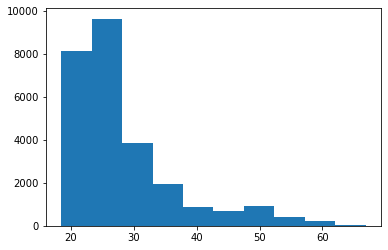

In [11]:
patient_log_df_g3r4v12s3 = pd.read_csv('output/consolidated_clinic_patient_log_base_g3r4v12s3.csv')
print(f"95th percentile of time in system: {patient_log_df_g3r4v12s3['time_in_system'].quantile(0.95):.1f} mins")
plt.hist(patient_log_df_g3r4v12s3['time_in_system']);

### Scenario: base_g3r4v13s3
```
Scenario: base_g3r4v13s3
             wait_for_greeter  wait_for_reg  wait_for_vaccinator  wait_for_scheduler  time_in_system
n_samples           1.500e+01        15.000               15.000              15.000          15.000
mean_mean           2.970e-03         0.458                1.105               0.050          22.823
sd_mean             6.653e-04         0.080                0.385               0.009           0.400
ci_95_lower         2.633e-03         0.417                0.910               0.046          22.621
ci_95_upper         3.306e-03         0.499                1.300               0.055          23.025
```

95th percentile of time in system: 27.1 mins


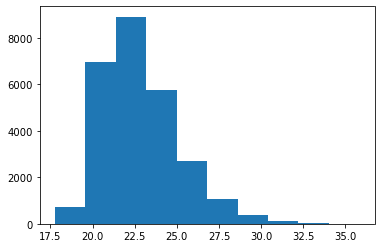

In [10]:
patient_log_df_g3r4v13s3 = pd.read_csv('output/consolidated_clinic_patient_log_base_g3r4v13s3.csv')
print(f"95th percentile of time in system: {patient_log_df_g3r4v13s3['time_in_system'].quantile(0.95):.1f} mins")
plt.hist(patient_log_df_g3r4v13s3['time_in_system']);

Looks like we never wait at the greeter stage or scheduler stage. Perhaps we can get by with one less staff person in each of those areas.

95th percentile of time in system: 26.7 mins


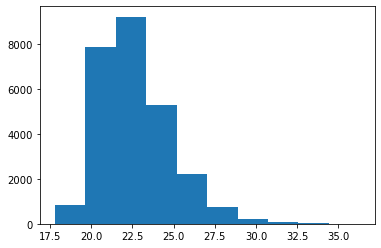

In [9]:
patient_log_df_g2r4v13s2 = pd.read_csv('output/consolidated_clinic_patient_log_base_g2r4v13s2.csv')
print(f"95th percentile of time in system: {patient_log_df_g2r4v13s2['time_in_system'].quantile(0.95):.1f} mins")
plt.hist(patient_log_df_g2r4v13s2['time_in_system']);

Yep, looks like we can easily reduce those staff levels to 2.

Now perhaps we might want to see if we can handle more volume with this capacity plan (g2r4v13s2). I'll crank it up to 200 patients per hour and label the scenario as 'par200_g2r4v13s2'.

95th percentile of time in system: 47.6 mins


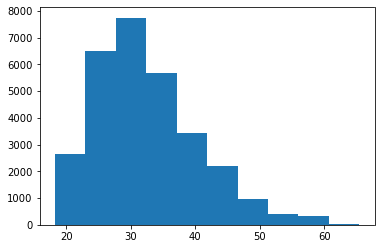

In [11]:
patient_log_df_par200_g2r4v13s2 = pd.read_csv('output/consolidated_clinic_patient_log_par200_g2r4v13s2.csv')
print(f"95th percentile of time in system: {patient_log_df_par200_g2r4v13s2['time_in_system'].quantile(0.95):.1f} mins")
plt.hist(patient_log_df_par200_g2r4v13s2['time_in_system']);

Now we are queueing for an average of about 10 minutes for the vaccinator. If this level of queueuing is deemed acceptable, then we might feel comfortable handling more patients.

```
Scenario: par200_g2r4v13s2
             wait_for_greeter  wait_for_reg  wait_for_vaccinator  wait_for_scheduler  time_in_system
n_samples              15.000        15.000               15.000              15.000          15.000
mean_mean               0.028         0.896               10.227               0.506          32.408
sd_mean                 0.003         0.250                4.469               0.078           4.618
ci_95_lower             0.026         0.769                7.966               0.467          30.071
ci_95_upper             0.029         1.022               12.489               0.546          34.745
```

Notice that while the mean time in system increased by about 10 minutes, the 95th percentile increased by about 20 minutes. Queueing systems are not linear things.

## Concluding thoughts
We have a vaccine clinic model that we can run from the command line or from within a Jupyter notebook. All of the input arguments can be specified within a simple text based configuration file. Each run we do has a scenario name that gets used in the output filenames so that we can easily keep track of which outputs go with which scenarios. Now we can use this model to explore capacity planning problems of interest. For example:

* For the target volume of 180 patients per hour, 3 greeters and 2 scheduling staff, how many vaccinators and how many registration staff would we need to keep the average total time spent in the clinic to under 40 minutes per patient? 
* how many staff of each type would we need if we wanted to be able to handle 500 patients per hour and still keep the average total time spent in the clinic to under 40 minutes per patient?
* what if no one needed a second dose - how does this affect staffing needs?
* ...